In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import json
import numpy as np
import pandas as pd
#import geopandas as gpd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.cm as cm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/QM2/ward-atlas-data-simpleversion.csv',encoding= 'unicode_escape')

In [ ]:
house_price = [
 'House Prices; Median House Price; 2007',
 'House Prices; Median House Price; 2008',
 'House Prices; Median House Price; 2009',
 'House Prices; Median House Price; 2010',
 'House Prices; Median House Price; 2011'        
]

GFR = [ 
 'Births and deaths; General Fertility Rate (GFR); 2007',
 'Births and deaths; General Fertility Rate (GFR); 2008',
 'Births and deaths; General Fertility Rate (GFR); 2009',
 'Births and deaths; General Fertility Rate (GFR); 2010',
 'Births and deaths; General Fertility Rate (GFR); 2011']

death = [
 'Births and deaths; Deaths; 2007',
 'Births and deaths; Deaths; 2008',
 'Births and deaths; Deaths; 2009',
 'Births and deaths; Deaths; 2010',
 'Births and deaths; Deaths; 2011']

fires = [
 'Fires; Deliberate Fires; 2007',
 'Fires; Deliberate Fires; 2008',
 'Fires; Deliberate Fires; 2009',
 'Fires; Deliberate Fires; 2010',
 'Fires; Deliberate Fires; 2011']

Female_life_expectancy = [ 'Life Expectancy; Female life expectancy; 2003-2007',
 'Life Expectancy; Female life expectancy; 2004-2008',
 'Life Expectancy; Female life expectancy; 2005-2009',
 'Life Expectancy; Female life expectancy; 2006-2010',
 'Life Expectancy; Female life expectancy; 2007-2011'
 ]

GCSE = [ 'GCSE; Average GCSE capped point scores; 2007',
 'GCSE; Average GCSE capped point scores; 2008',
 'GCSE; Average GCSE capped point scores; 2009',
 'GCSE; Average GCSE capped point scores; 2010',
 'GCSE; Average GCSE capped point scores; 2011']


In [ ]:
GCSE_data = np.concatenate([
     df[GCSE[0]],df[GCSE[1]],df[GCSE[2]],df[GCSE[3]],df[GCSE[4]]
  ])

Female_life_expectancy_data = np.concatenate([
    df[Female_life_expectancy[0]],df[Female_life_expectancy[1]],df[Female_life_expectancy[2]],df[Female_life_expectancy[3]],df[Female_life_expectancy[4]]
])

fires_data = np.concatenate([
    df[fires[0]],df[fires[1]],df[fires[2]],df[fires[3]],df[fires[4]]
])

death_data = np.concatenate([
    df[death[0]],df[death[1]],df[death[2]],df[death[3]],df[death[4]]
])

GFR_data = np.concatenate([
    df[GFR[0]],df[GFR[1]],df[GFR[2]],df[GFR[3]],df[GFR[4]]
])

house_price_data = np.concatenate([
    df[house_price[0]],df[house_price[1]],df[house_price[2]],df[house_price[3]],df[house_price[4]]
])


In [ ]:
GCSE_df = pd.DataFrame(GCSE_data)
Female_life_expectancy_df = pd.DataFrame(Female_life_expectancy_data)
fires_df = pd.DataFrame(fires_data)
death_df = pd.DataFrame(death_data)
GFR_df = pd.DataFrame(GFR_data)
house_price_df = pd.DataFrame(house_price_data)

## Data input and output

In [ ]:
X = pd.concat([GCSE_df,fires_df,death_df,GFR_df], axis=1, join="inner")
y = house_price_df

## Fully connected Neural Network Model
2 hidden layers with 25  units in each

In [ ]:
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [ ]:
X_train_pd = X[625:]
y_train_pd = y[625:]
X_test_pd = X[:624]
y_test_pd = y[:624]

In [ ]:
min_max_scaler = MinMaxScaler()  
min_max_scaler.fit(X_train_pd)
X_train = min_max_scaler.transform(X_train_pd)  
min_max_scaler.fit(y_train_pd) 
y_train = min_max_scaler.transform(y_train_pd)  
min_max_scaler.fit(X_test_pd)  
X_test = min_max_scaler.transform(X_test_pd)  
min_max_scaler.fit(y_test_pd)  
y_test = min_max_scaler.transform(y_test_pd)  

In [ ]:
model_1 = Sequential()

model_1.add(Dense(25, input_dim=4,activation='relu'))
model_1.add(Dense(25, activation='relu'))


model_1.add(Dense(1,activation='linear'))

model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(X_train, y_train, batch_size = 64, epochs=200).history
pd.DataFrame(history).plot()
plt.show()

## Prediction result

MSE: 0.01
RMSE: 0.07


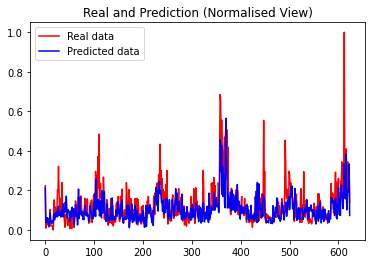

MSE: 102513259966.59
RMSE: 320176.92


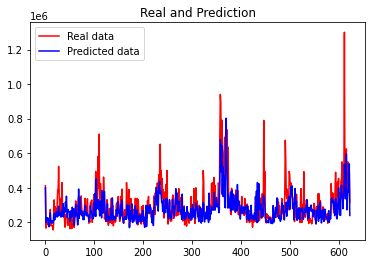

In [ ]:
y_pred_1 = model_1.predict(X_test)
mse_1_1 = mean_squared_error(y_test, y_pred_1)
print("MSE: %.2f" % mse_1_1)
print("RMSE: %.2f" % (mse_1_1**(1/2.0)))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred_1, color = 'blue', label = 'Predicted data')
plt.title('Real and Prediction (Normalised View)')
plt.legend()
plt.show()



min_max_scaler.fit(y_test_pd)
y_pred_1_inv = min_max_scaler.inverse_transform(y_pred_1)  
mse_1_2 = mean_squared_error(y_test_pd, y_pred_1)
print("MSE: %.2f" % mse_1_2)
print("RMSE: %.2f" % (mse_1_2**(1/2.0)))

plt.plot(y_test_pd, color = 'red', label = 'Real data')
plt.plot(y_pred_1_inv, color = 'blue', label = 'Predicted data')
plt.title('Real and Prediction')
plt.legend()
plt.show()

In [ ]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [ ]:
(np.array(column(X_test, 1))).reshape(624,1)


In [ ]:
X_test_after_inv = min_max_scaler.inverse_transform((np.array(X_test)))

In [ ]:
column(X_test_after_inv,0)

## R-squared

In [ ]:
# R-squared
unexplained_error1 = tf.reduce_sum(tf.square(tf.subtract(y_test_pd, y_pred_1_inv)))
total_error1 = tf.reduce_sum(tf.square(tf.subtract(y_test_pd, tf.reduce_mean(y_test))))
R_squared1 = tf.subtract(1, tf.divide(unexplained_error1, total_error1))
R_squared1

<tf.Tensor: shape=(), dtype=float64, numpy=0.9357490987553574>

Standard residual

In [ ]:
model_1_standard_residual = (y_test_pd-y_pred_1_inv)/(np.std(y_test_pd-y_pred_1_inv))

In [ ]:
model_1_standard_residual

,0
0,0.163014
1,-0.394786
2,-0.548668
3,-0.454404
4,0.048125
...,...
619,2.154008
620,0.799546
621,0.758127
622,-0.559785


In [ ]:
import seaborn as sns

Standard residual distribution plot

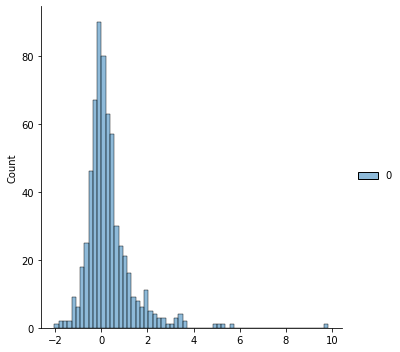

In [ ]:
sns.displot(model_1_standard_residual)

## Residual vs fitted plot

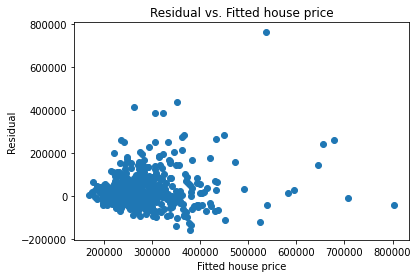

In [ ]:
# residual plot 
plt.scatter(y_pred_1_inv, y_test_pd-y_pred_1_inv)
# adding title and labels
plt.xlabel('Fitted house price')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted house price')
plt.show()

## Standard residual vs fitted plot

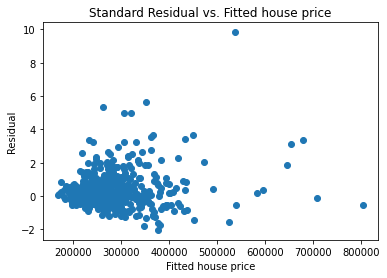

In [ ]:
#Standard residual plot 
plt.scatter(y_pred_1_inv, model_1_standard_residual)
# adding title and labels
plt.xlabel('Fitted house price')
plt.ylabel('Residual')
plt.title('Standard Residual vs. Fitted house price')
plt.show()

## Residual vs predictors plots

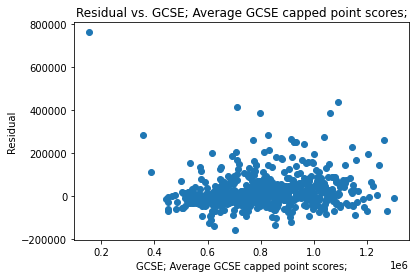

In [ ]:
# residual plot 
plt.scatter(column(X_test_after_inv,0), y_test_pd-y_pred_1_inv)
# adding title and labels
plt.xlabel('GCSE; Average GCSE capped point scores;')
plt.ylabel('Residual')
plt.title('Residual vs. GCSE; Average GCSE capped point scores;')
plt.show()

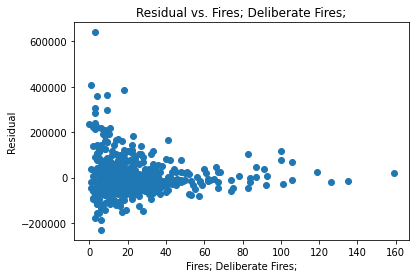

In [ ]:
# residual plot 
plt.scatter(column(X_test_after_inv,1), y_test_pd-y_pred_1_inv)
# adding title and labels
plt.xlabel('Fires; Deliberate Fires;')
plt.ylabel('Residual')
plt.title('Residual vs. Fires; Deliberate Fires;')
plt.show()

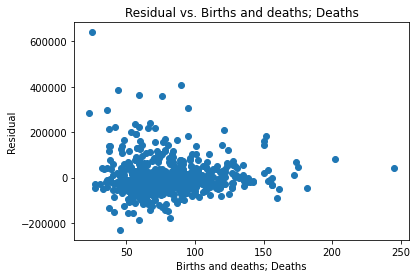

In [ ]:
# residual plot 
plt.scatter(column(X_test_after_inv,2), y_test_pd-y_pred_1_inv)
# adding title and labels
plt.xlabel('Births and deaths; Deaths')
plt.ylabel('Residual')
plt.title('Residual vs. Births and deaths; Deaths')
plt.show()

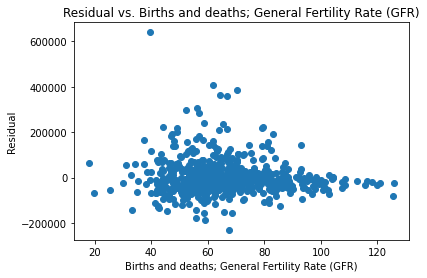

In [ ]:
# residual plot 
plt.scatter(column(X_test_after_inv,3), y_test_pd-y_pred_1_inv)
# adding title and labels
plt.xlabel('Births and deaths; General Fertility Rate (GFR)')
plt.ylabel('Residual')
plt.title('Residual vs. Births and deaths; General Fertility Rate (GFR)')
plt.show()

## Standard residul vs predictors plot

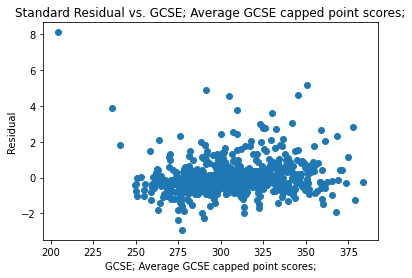

In [ ]:
# residual plot 
plt.scatter(column(X_test_after_inv,0), (y_test_pd-y_pred_1_inv)/(np.std(y_test_pd-y_pred_1_inv)))
# adding title and labels
plt.xlabel('GCSE; Average GCSE capped point scores;')
plt.ylabel('Residual')
plt.title('Standard Residual vs. GCSE; Average GCSE capped point scores;')
plt.show()

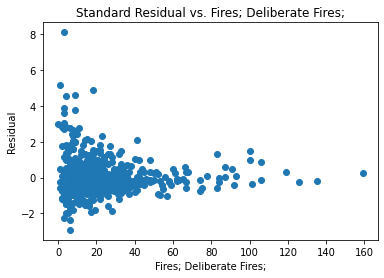

In [ ]:
# residual plot 
plt.scatter(column(X_test_after_inv,1), (y_test_pd-y_pred_1_inv)/(np.std(y_test_pd-y_pred_1_inv)))
# adding title and labels
plt.xlabel('Fires; Deliberate Fires;')
plt.ylabel('Residual')
plt.title('Standard Residual vs. Fires; Deliberate Fires;')
plt.show()

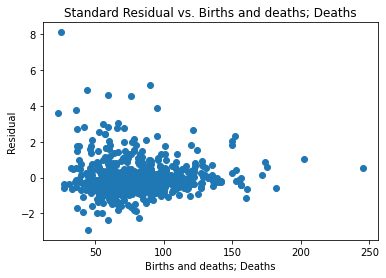

In [ ]:
# residual plot 
plt.scatter(column(X_test_after_inv,2), (y_test_pd-y_pred_1_inv)/(np.std(y_test_pd-y_pred_1_inv)))
# adding title and labels
plt.xlabel('Births and deaths; Deaths')
plt.ylabel('Residual')
plt.title('Standard Residual vs. Births and deaths; Deaths')
plt.show()

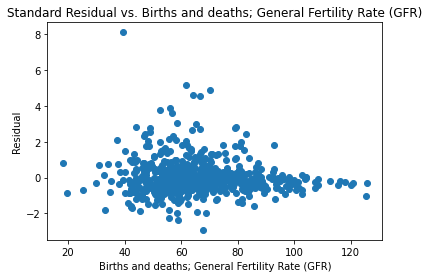

In [ ]:
# residual plot 
plt.scatter(column(X_test_after_inv,3), (y_test_pd-y_pred_1_inv)/(np.std(y_test_pd-y_pred_1_inv)))
# adding title and labels
plt.xlabel('Births and deaths; General Fertility Rate (GFR)')
plt.ylabel('Residual')
plt.title('Standard Residual vs. Births and deaths; General Fertility Rate (GFR)')
plt.show()

# Support vector machine 

In [ ]:
# Import libraries for Support Vector Machine
from sklearn.model_selection import train_test_split
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Train the model
model_svm = svm.SVR()
model_svm.fit(X_train, y_train) 

SVR()

In [ ]:
# Make prediction
y_pred_svm = model_svm.predict(X_test)

Mean squred error

In [ ]:
mse_2 = mean_squared_error(y_test, y_pred_svm)
print("MSE: %.2f" % mse_2)
print("RMSE: %.2f" % (mse_2**(1/2.0)))

MSE: 0.01
RMSE: 0.08


Prediction result

MSE: 0.01
RMSE: 0.08


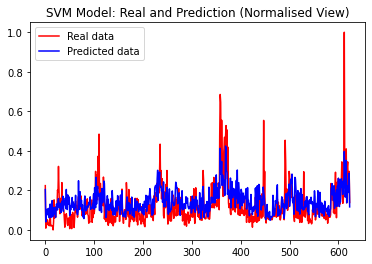

MSE: 102513259966.59
RMSE: 320176.92


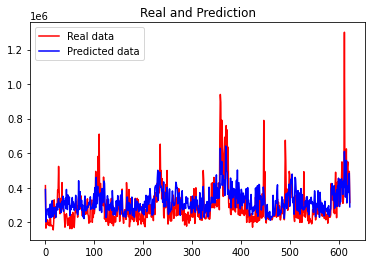

In [ ]:
y_pred_2 = model_svm.predict(X_test)

mse_2_1 = mean_squared_error(y_test, y_pred_2)
print("MSE: %.2f" % mse_2_1)
print("RMSE: %.2f" % (mse_2_1**(1/2.0)))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred_2, color = 'blue', label = 'Predicted data')
plt.title('SVM Model: Real and Prediction (Normalised View)')
plt.legend()
plt.show()


min_max_scaler.fit(y_test_pd)
y_pred_2_inv = min_max_scaler.inverse_transform(y_pred_2.reshape(624,1))  
mse_2_2 = mean_squared_error(y_test_pd, y_pred_2_inv)
print("MSE: %.2f" % mse_1_2)
print("RMSE: %.2f" % (mse_1_2**(1/2.0)))

plt.plot(y_test_pd, color = 'red', label = 'Real data')
plt.plot(y_pred_2_inv, color = 'blue', label = 'Predicted data')
plt.title('Real and Prediction')
plt.legend()
plt.show()

## R-squared

In [ ]:
# R-squared
unexplained_error2 = tf.reduce_sum(tf.square(tf.subtract(y_test_pd, y_pred_2_inv)))
total_error2 = tf.reduce_sum(tf.square(tf.subtract(y_test_pd, tf.reduce_mean(y_test))))
R_squared2 = tf.subtract(1, tf.divide(unexplained_error2, total_error2))
R_squared2

<tf.Tensor: shape=(), dtype=float64, numpy=0.9230024728888365>

In [ ]:
model_2_standard_residual = (y_test_pd-y_pred_2_inv)/(np.std(y_test_pd-y_pred_2_inv))

## Residual vs fitted plot

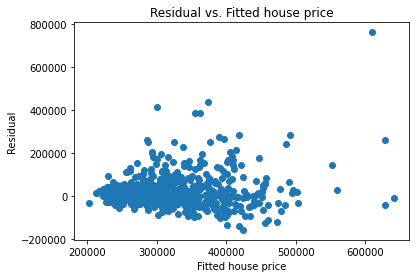

In [ ]:
# residual plot 
plt.scatter(y_pred_2_inv, y_test_pd-y_pred_1_inv)
# adding title and labels
plt.xlabel('Fitted house price')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted house price')
plt.show()

## Standard residual vs fitted plot

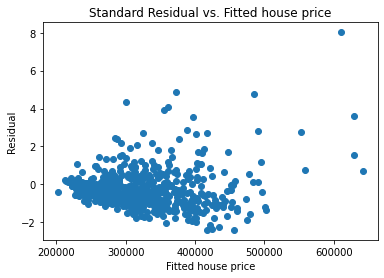

In [ ]:
#Standard residual plot 
plt.scatter(y_pred_2_inv, model_2_standard_residual)
# adding title and labels
plt.xlabel('Fitted house price')
plt.ylabel('Residual')
plt.title('Standard Residual vs. Fitted house price')
plt.show()

## Standard residual distribution plot

In [ ]:
model_2_standard_residual = (y_test_pd-y_pred_2_inv)/(np.std(y_test_pd-y_pred_2_inv))

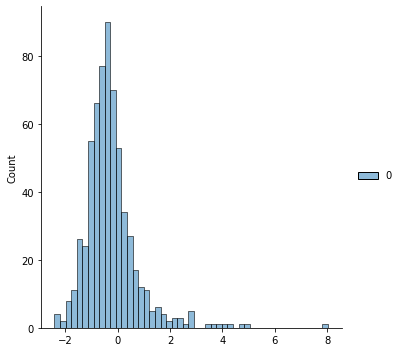

In [ ]:
sns.displot(model_2_standard_residual)

## Residual vs predictors plots

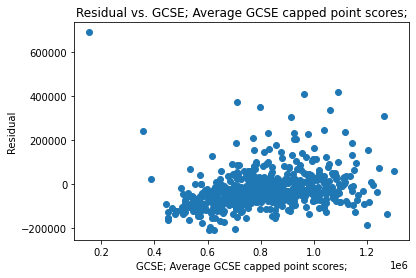

In [ ]:
# residual plot 
plt.scatter(column(X_test_after_inv,0), y_test_pd-y_pred_2_inv)
# adding title and labels
plt.xlabel('GCSE; Average GCSE capped point scores;')
plt.ylabel('Residual')
plt.title('Residual vs. GCSE; Average GCSE capped point scores;')
plt.show()

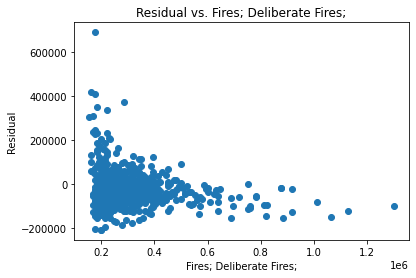

In [ ]:
# residual plot 
plt.scatter(column(X_test_after_inv,1), y_test_pd-y_pred_2_inv)
# adding title and labels
plt.xlabel('Fires; Deliberate Fires;')
plt.ylabel('Residual')
plt.title('Residual vs. Fires; Deliberate Fires;')
plt.show()

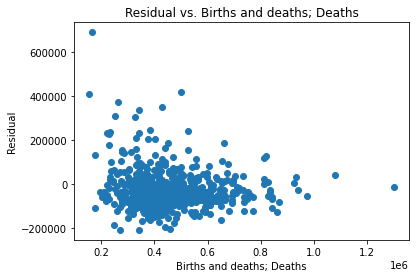

In [ ]:
# residual plot 
plt.scatter(column(X_test_after_inv,2), y_test_pd-y_pred_2_inv)
# adding title and labels
plt.xlabel('Births and deaths; Deaths')
plt.ylabel('Residual')
plt.title('Residual vs. Births and deaths; Deaths')
plt.show()

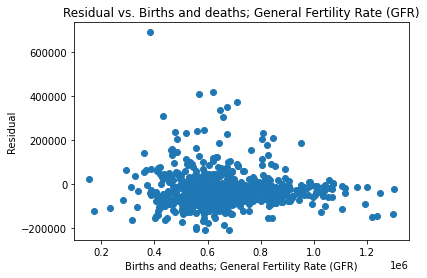

In [ ]:
# residual plot 
plt.scatter(column(X_test_after_inv,3), y_test_pd-y_pred_2_inv)
# adding title and labels
plt.xlabel('Births and deaths; General Fertility Rate (GFR)')
plt.ylabel('Residual')
plt.title('Residual vs. Births and deaths; General Fertility Rate (GFR)')
plt.show()

## Standard Residual vs predictors plots

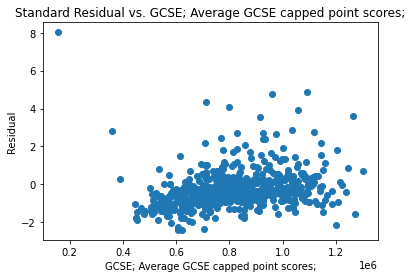

In [ ]:
# residual plot 
plt.scatter(column(X_test_after_inv,0), model_2_standard_residual)
# adding title and labels
plt.xlabel('GCSE; Average GCSE capped point scores;')
plt.ylabel('Residual')
plt.title('Standard Residual vs. GCSE; Average GCSE capped point scores;')
plt.show()

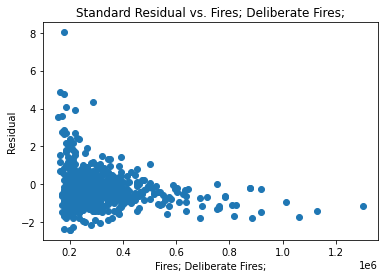

In [ ]:
# residual plot 
plt.scatter(column(X_test_after_inv,1), model_2_standard_residual)
# adding title and labels
plt.xlabel('Fires; Deliberate Fires;')
plt.ylabel('Residual')
plt.title('Standard Residual vs. Fires; Deliberate Fires;')
plt.show()

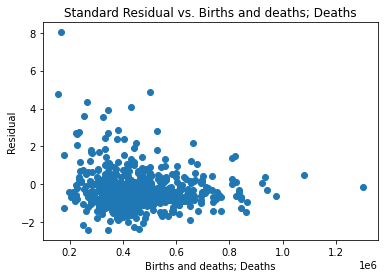

In [ ]:
# residual plot 
plt.scatter(column(X_test_after_inv,2), model_2_standard_residual)
# adding title and labels
plt.xlabel('Births and deaths; Deaths')
plt.ylabel('Residual')
plt.title('Standard Residual vs. Births and deaths; Deaths')
plt.show()

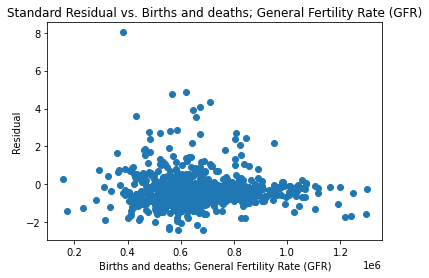

In [ ]:
# residual plot 
plt.scatter(column(X_test_after_inv,3), model_2_standard_residual)
# adding title and labels
plt.xlabel('Births and deaths; General Fertility Rate (GFR)')
plt.ylabel('Residual')
plt.title('Standard Residual vs. Births and deaths; General Fertility Rate (GFR)')
plt.show()